# Titanic
Here's a [link](https://www.kaggle.com/c/titanic/discussion/26284) to a kaggle forum post that talks about what a good score for the Titanic dataset is. It turns out that a "top class" score should be in the 83-84% range. My first iteration got to about 79%, so that's not too terribly far off. I'll have to go through and try some different types of classifiers and what not tomorrow and see if I can bump that score up a little bit. I'll also just try and submit it through kaggle and see what kind of score I get on the full dataset.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [9]:
pd.set_option('display.max_columns',100)

In [10]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
gender_submission = pd.read_csv('gender_submission.csv')

## Data Exploration

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [14]:
# df_train['Pclass'].value_counts(dropna=False)
# No NaN values
df_train[['Survived','Pclass']].groupby('Pclass').describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [15]:
# df_train['Sex'].value_counts(dropna=False)
# No NaN values
df_train[['Survived','Sex']].groupby('Sex').describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

<IPython.core.display.Javascript object>


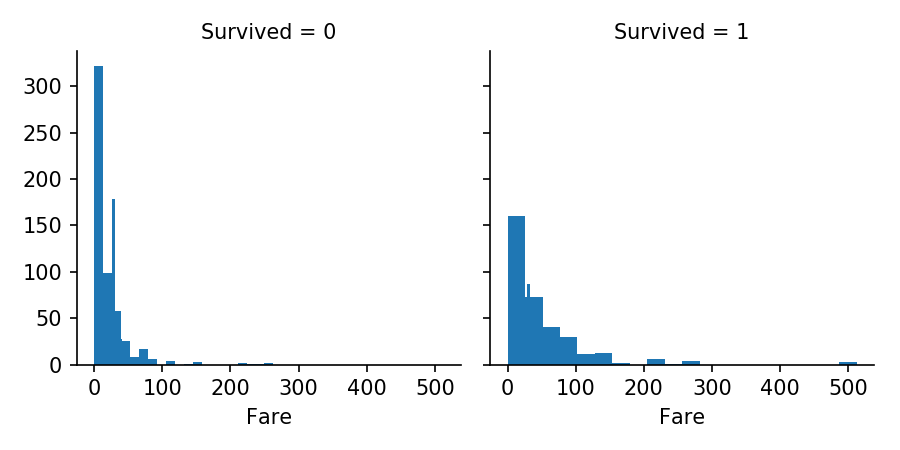

In [99]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<IPython.core.display.Javascript object>


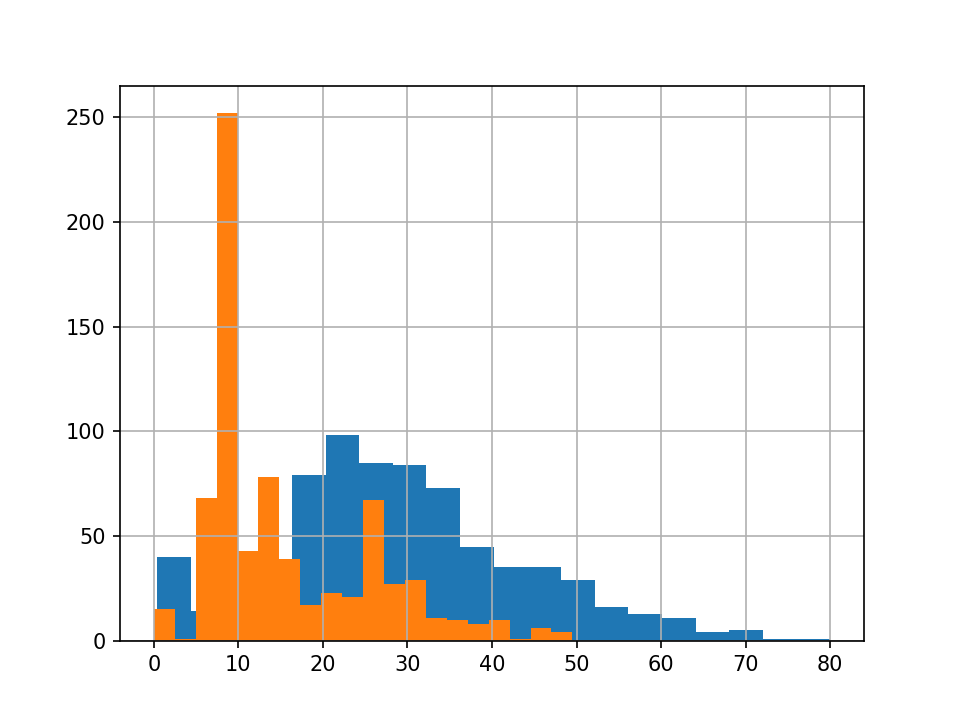

In [16]:
df_train['Age'].hist(bins=20)

In [17]:
# df_train['SibSp'].value_counts(dropna=False)
# No NaN values
df_train[['Survived','SibSp']].groupby('SibSp').describe()

Survived                                              
         count      mean       std  min  25%  50%   75%  max
SibSp                                                       
0        608.0  0.345395  0.475888  0.0  0.0  0.0  1.00  1.0
1        209.0  0.535885  0.499908  0.0  0.0  1.0  1.00  1.0
2         28.0  0.464286  0.507875  0.0  0.0  0.0  1.00  1.0
3         16.0  0.250000  0.447214  0.0  0.0  0.0  0.25  1.0
4         18.0  0.166667  0.383482  0.0  0.0  0.0  0.00  1.0
5          5.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
8          7.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0

In [18]:
# df_train['Parch'].value_counts()
# No NaN values
df_train[['Survived','Parch']].groupby('Parch').describe()

Survived                                             
         count      mean       std  min  25%  50%  75%  max
Parch                                                      
0        678.0  0.343658  0.475279  0.0  0.0  0.0  1.0  1.0
1        118.0  0.550847  0.499529  0.0  0.0  1.0  1.0  1.0
2         80.0  0.500000  0.503155  0.0  0.0  0.5  1.0  1.0
3          5.0  0.600000  0.547723  0.0  0.0  1.0  1.0  1.0
4          4.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5          5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0
6          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0

In [19]:
df_train['Ticket'].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [20]:
df_train['Fare'].isna().sum()

0

<IPython.core.display.Javascript object>


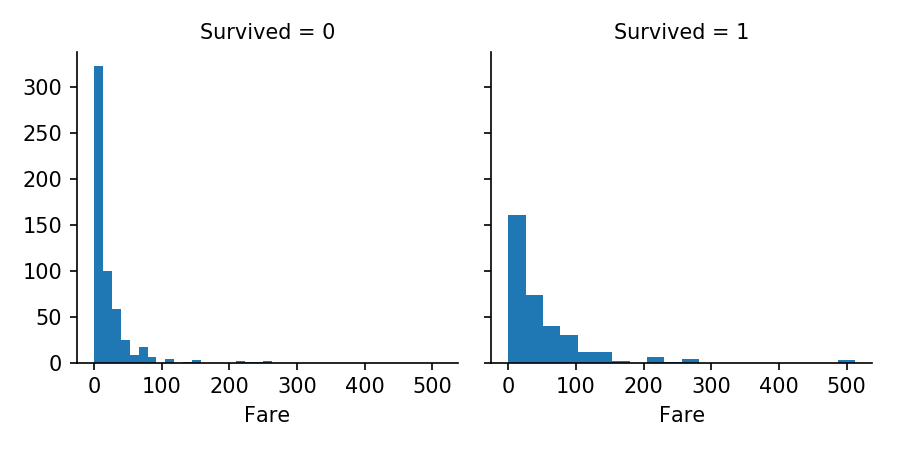

In [103]:
g2 = sns.FacetGrid(df_train, col='Survived')
g2.map(plt.hist, 'Fare', bins=20)


In [21]:
df_fares = df_train[df_train['Fare'] < 50]
df_fares['Fare'].hist(bins=20)

In [22]:
df_train['Cabin'].value_counts(dropna=False)
# Cabin data is messy, most are NaN values, the rest are noisy/non-standardized

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
C22 C26          3
D                3
F2               3
E101             3
E121             2
C2               2
B58 B60          2
E8               2
B35              2
C126             2
B51 B53 B55      2
D36              2
C93              2
B49              2
D20              2
D33              2
C125             2
B28              2
C92              2
B5               2
D17              2
C65              2
B22              2
B18              2
C83              2
              ... 
A14              1
B94              1
D47              1
C111             1
C54              1
B50              1
B30              1
D46              1
C95              1
C30              1
C87              1
C110             1
A31              1
C91              1
E46              1
B39              1
B41              1
A32              1
E63              1
D21              1
C101             1
C103        

In [23]:
# df_train['Embarked'].value_counts(dropna=False)
# Only 2 NaN values
df_train[['Survived','Embarked']].groupby('Embarked').describe()

Survived                                             
            count      mean       std  min  25%  50%  75%  max
Embarked                                                      
C           168.0  0.553571  0.498608  0.0  0.0  1.0  1.0  1.0
Q            77.0  0.389610  0.490860  0.0  0.0  0.0  1.0  1.0
S           644.0  0.336957  0.473037  0.0  0.0  0.0  1.0  1.0

In [24]:
df_train[['Pclass','Fare']].groupby('Pclass').describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [25]:
df_train['Age'].isna().sum(), df_train['Age'].notna().sum()

(177, 714)

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [27]:
pclass_to_id = {1:'Upper',2:'Middle',3:'Lower'}

In [76]:
def clean_and_convert_to_categorical(df_train):

    df_train['Sex'] = df_train['Sex'].astype('category')
    df_train['Embarked'] = df_train['Embarked'].astype('category')
    df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
    df_train['Pclass'] = df_train['Pclass'].astype('category')
    df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())
    
    return(df_train)

df_train = clean_and_convert_to_categorical(df_train)
df_test = clean_and_convert_to_categorical(df_test)

## SKLearn Stuff

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [49]:
clf = Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf',LogisticRegression()),
])

In [50]:
features = ['Pclass','Sex','Embarked','Fare','Age']
label = 'Survived'

X_train, X_test, y_train, y_test = train_test_split(df_train[features],df_train[label],random_state=0)

In [51]:
parameters = {
#     'clf__C':[.001,.1,1,10,100,1000]
    'clf__C':[1]
}

In [52]:
X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

In [53]:
gs_clf = GridSearchCV(clf,parameters,cv=5,n_jobs=-1)

In [54]:
gs_clf.fit(X_train_dummies, y_train)

C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={'clf__C': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
# df_cv_results = pd.DataFrame(gs_clf.cv_results_)
# df_cv_results.sort_values('rank_test_score')

In [56]:
print('Train Score: ', gs_clf.score(X_train_dummies,y_train))
print('Test Score: ', gs_clf.score(X_test_dummies, y_test))

Train Score:  0.7949101796407185
Test Score:  0.8026905829596412


In [57]:
gs_clf.best_estimator_.named_steps['clf'].coef_

array([[ 0.15997499, -1.71668188,  0.98863131,  0.3441533 , -0.87121813,
         1.46906582, -1.00749934,  0.27055715,  0.204674  , -0.28445741]])

In [58]:
cols = X_train_dummies.columns

In [59]:
df_coefs=pd.DataFrame(gs_clf.best_estimator_.named_steps['clf'].coef_, columns=cols)

In [60]:
df_coefs

,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.159975,-1.716682,0.988631,0.344153,-0.871218,1.469066,-1.007499,0.270557,0.204674,-0.284457


In [61]:
X_train_dummies.head()

,Fare,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
105,7.8958,28.0,0,0,1,0,1,0,0,1
68,7.9250,17.0,0,0,1,1,0,0,0,1
253,16.1000,30.0,0,0,1,0,1,0,0,1
320,7.2500,22.0,0,0,1,0,1,0,0,1
706,13.5000,45.0,0,1,0,1,0,0,0,1


## Predictions to Submit

In [77]:
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train[label]

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

In [79]:
gs_clf2 = gs_clf
gs_clf.fit(X_train_dummies,y_train)
predictions = gs_clf.predict(X_test_dummies)

C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
s_predictions = pd.DataFrame(df_test['PassengerId'])
s_predictions['Survived']=predictions

In [91]:
s_predictions.to_csv('titanic_predictions.csv',index=False)

In [92]:
a = pd.read_csv('titanic_predictions.csv')
a

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Other Models besides Logistic Regression

### Support Vector Machines
With a linear kernel, highest accuracy was .780

With an rbf kernel, the highest accuracy was .816

In [104]:
from sklearn.svm import SVC

In [155]:
clf = Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf',SVC(gamma='scale')),
])

features = ['Pclass','Sex','Embarked','Fare','Age']
label = 'Survived'

X_train, X_test, y_train, y_test = train_test_split(df_train[features],df_train[label],random_state=0)

parameters = {
    'clf__C':[5,10,15,20],
#     'clf__C':[1],
    'clf__kernel':['linear','rbf']
}

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

gs_clf = GridSearchCV(clf,parameters,cv=5,n_jobs=-1)

gs_clf.fit(X_train_dummies, y_train)

print('Train Score: ', gs_clf.score(X_train_dummies,y_train))
print('Test Score: ', gs_clf.score(X_test_dummies, y_test))

Train Score:  0.8278443113772455
Test Score:  0.8161434977578476


C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [156]:
# df_cv_results = pd.DataFrame(gs_clf.cv_results_) <- uncomment this when you change the above parameters
df_cv_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
16,0.205255,0.012706,0.021539,0.006687,10,1,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.805970,0.858209,0.820896,0.796992,0.864662,0.829341,0.027346,1,0.956929,0.943820,0.956929,0.964486,0.943925,0.953218,0.008114
13,0.186102,0.008477,0.017554,0.002792,7,2,"{'clf__max_depth': 7, 'clf__min_samples_leaf': 2}",0.813433,0.858209,0.813433,0.804511,0.842105,0.826347,0.020370,2,0.885768,0.882022,0.872659,0.882243,0.874766,0.879492,0.004947
12,0.188297,0.006474,0.016755,0.000748,7,1,"{'clf__max_depth': 7, 'clf__min_samples_leaf': 1}",0.813433,0.858209,0.828358,0.789474,0.842105,0.826347,0.023623,2,0.910112,0.906367,0.900749,0.885981,0.889720,0.898586,0.009334
21,0.198070,0.003489,0.017753,0.001828,20,2,"{'clf__max_depth': 20, 'clf__min_samples_leaf'...",0.798507,0.858209,0.813433,0.796992,0.857143,0.824850,0.027399,4,0.910112,0.898876,0.906367,0.912150,0.899065,0.905314,0.005502
9,0.180916,0.002720,0.015957,0.001262,5,2,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 2}",0.828358,0.835821,0.813433,0.789474,0.849624,0.823353,0.020540,5,0.848315,0.837079,0.840824,0.850467,0.844860,0.844309,0.004872
22,0.187698,0.003478,0.017752,0.001163,20,5,"{'clf__max_depth': 20, 'clf__min_samples_leaf'...",0.835821,0.850746,0.783582,0.804511,0.842105,0.823353,0.025292,5,0.857678,0.842697,0.855805,0.861682,0.857944,0.855161,0.006517
10,0.181315,0.004388,0.016357,0.001197,5,5,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 5}",0.813433,0.843284,0.805970,0.796992,0.849624,0.821856,0.020822,7,0.842697,0.831461,0.848315,0.854206,0.828037,0.840943,0.009897
8,0.204453,0.022220,0.016755,0.000977,5,1,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 1}",0.805970,0.850746,0.813433,0.789474,0.842105,0.820359,0.022814,8,0.852060,0.848315,0.840824,0.852336,0.854206,0.849548,0.004763
17,0.282446,0.082834,0.024334,0.005699,10,2,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.798507,0.850746,0.798507,0.789474,0.849624,0.817365,0.026987,9,0.904494,0.895131,0.904494,0.904673,0.899065,0.901572,0.003859
18,0.338095,0.020115,0.033114,0.002221,10,5,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.820896,0.858209,0.768657,0.796992,0.834586,0.815868,0.030863,10,0.848315,0.852060,0.859551,0.867290,0.846729,0.854789,0.007659


## Support Vector Machine Submission

In [157]:
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train[label]

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

In [158]:
gs_clf2 = gs_clf
gs_clf.fit(X_train_dummies,y_train)
predictions = gs_clf.predict(X_test_dummies)

C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [159]:
s_predictions = pd.DataFrame(df_test['PassengerId'])
s_predictions['Survived']=predictions

In [162]:
s_predictions.to_csv('titanic_predictions_svm.csv',index=False)

In [163]:
a = pd.read_csv('titanic_predictions_svm.csv')
a

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Decision Tree
The highest accuracy for the test set was .807

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
clf = Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf',DecisionTreeClassifier()),
])

features = ['Pclass','Sex','Embarked','Fare','Age']
label = 'Survived'

X_train, X_test, y_train, y_test = train_test_split(df_train[features],df_train[label],random_state=0)

parameters = {
    'clf__max_depth':[1,2,3,5,7,10],
    'clf__min_samples_leaf':[1,2,5,10,20]
}

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

gs_clf = GridSearchCV(clf,parameters,cv=5,n_jobs=-1)

gs_clf.fit(X_train_dummies, y_train)

print('Train Score: ', gs_clf.score(X_train_dummies,y_train))
print('Test Score: ', gs_clf.score(X_test_dummies, y_test))

Train Score:  0.8308383233532934
Test Score:  0.8026905829596412


C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [141]:
# df_cv_results = pd.DataFrame(gs_clf.cv_results_) # <- uncomment this when you change the above parameters
df_cv_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,0.014361,7.943826e-03,0.002593,4.878394e-04,3,1,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 1}",0.813433,0.820896,0.805970,0.812030,0.864662,0.823353,0.021139,1,0.831461,0.829588,0.835206,0.833645,0.820561,0.830092,0.005133
11,0.008974,2.520893e-03,0.002593,4.884810e-04,3,2,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 2}",0.805970,0.820896,0.805970,0.812030,0.864662,0.821856,0.022033,2,0.829588,0.827715,0.833333,0.833645,0.818692,0.828595,0.005437
15,0.008378,4.885777e-04,0.003191,3.992566e-04,5,1,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 1}",0.791045,0.820896,0.791045,0.812030,0.864662,0.815868,0.027005,3,0.859551,0.844569,0.874532,0.874766,0.857944,0.862272,0.011366
12,0.007780,7.465951e-04,0.002992,7.539457e-07,3,5,"{'clf__max_depth': 3, 'clf__min_samples_leaf': 5}",0.813433,0.820896,0.768657,0.812030,0.864662,0.815868,0.030501,3,0.829588,0.827715,0.829588,0.833645,0.818692,0.827846,0.004970
13,0.009973,3.026139e-03,0.002795,3.998089e-04,3,10,"{'clf__max_depth': 3, 'clf__min_samples_leaf':...",0.813433,0.813433,0.768657,0.812030,0.849624,0.811377,0.025674,5,0.822097,0.822097,0.829588,0.833645,0.816822,0.824850,0.005990
16,0.008178,3.999001e-04,0.002593,4.883838e-04,5,2,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 2}",0.761194,0.813433,0.798507,0.804511,0.872180,0.809880,0.035812,6,0.853933,0.838951,0.863296,0.867290,0.850467,0.854787,0.009989
17,0.007977,6.327120e-04,0.002594,4.883252e-04,5,5,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 5}",0.820896,0.805970,0.761194,0.789474,0.864662,0.808383,0.034367,7,0.846442,0.837079,0.855805,0.859813,0.841121,0.848052,0.008596
20,0.008775,7.461149e-04,0.002396,4.876446e-04,7,1,"{'clf__max_depth': 7, 'clf__min_samples_leaf': 1}",0.791045,0.813433,0.820896,0.781955,0.819549,0.805389,0.015867,8,0.893258,0.889513,0.900749,0.910280,0.882243,0.895209,0.009615
14,0.011569,3.372842e-03,0.002793,3.991368e-04,3,20,"{'clf__max_depth': 3, 'clf__min_samples_leaf':...",0.813433,0.813433,0.783582,0.781955,0.796992,0.797904,0.013737,9,0.818352,0.818352,0.818352,0.826168,0.816822,0.819609,0.003333
24,0.008976,1.093059e-03,0.002992,6.305249e-04,7,20,"{'clf__max_depth': 7, 'clf__min_samples_leaf':...",0.820896,0.813433,0.738806,0.796992,0.796992,0.793413,0.028900,10,0.825843,0.818352,0.823970,0.828037,0.816822,0.822605,0.004322


## Random Forest
Highest test score for this one was .834, which is pretty solid. 

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
clf = Pipeline([
    ('scaler',MinMaxScaler()),
    ('clf',RandomForestClassifier(n_estimators=100)),
])

features = ['Pclass','Sex','Embarked','Fare','Age']
label = 'Survived'

X_train, X_test, y_train, y_test = train_test_split(df_train[features],df_train[label],random_state=0)

parameters = {
    'clf__max_depth':[2,3,5,7,10,20],
    'clf__min_samples_leaf':[1,2,5,10]
}

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

gs_clf = GridSearchCV(clf,parameters,cv=5,n_jobs=-1)

gs_clf.fit(X_train_dummies, y_train)

print('Train Score: ', gs_clf.score(X_train_dummies,y_train))
print('Test Score: ', gs_clf.score(X_test_dummies, y_test))

C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train Score:  0.8922155688622755
Test Score:  0.8295964125560538


In [174]:
df_cv_results = pd.DataFrame(gs_clf.cv_results_) # <- uncomment this when you change the above parameters
df_cv_results.sort_values('rank_test_score')

C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\util

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
12,0.226793,0.005337,0.019348,0.001492,7,1,"{'clf__max_depth': 7, 'clf__min_samples_leaf': 1}",0.828358,0.865672,0.828358,0.796992,0.849624,0.833832,0.023135,1,0.900749,0.908240,0.915730,0.889720,0.897196,0.902327,0.008971
13,0.220610,0.011378,0.018950,0.001092,7,2,"{'clf__max_depth': 7, 'clf__min_samples_leaf': 2}",0.820896,0.850746,0.813433,0.804511,0.842105,0.826347,0.017413,2,0.880150,0.878277,0.865169,0.878505,0.872897,0.874999,0.005489
18,0.224400,0.008151,0.019548,0.001197,10,5,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.820896,0.850746,0.805970,0.796992,0.849624,0.824850,0.022043,3,0.848315,0.848315,0.863296,0.857944,0.852336,0.854041,0.005820
16,0.246740,0.013150,0.023737,0.003807,10,1,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.798507,0.850746,0.828358,0.796992,0.849624,0.824850,0.023514,3,0.958801,0.955056,0.964419,0.964486,0.940187,0.956590,0.008944
17,0.234970,0.009926,0.021742,0.000977,10,2,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.791045,0.858209,0.798507,0.812030,0.849624,0.821856,0.027159,5,0.906367,0.900749,0.902622,0.906542,0.882243,0.899705,0.009007
22,0.240956,0.041571,0.021543,0.003816,20,5,"{'clf__max_depth': 20, 'clf__min_samples_leaf'...",0.820896,0.858209,0.798507,0.796992,0.834586,0.821856,0.023022,5,0.855805,0.848315,0.863296,0.857944,0.854206,0.855913,0.004885
8,0.183510,0.004593,0.018351,0.002491,5,1,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 1}",0.805970,0.843284,0.813433,0.789474,0.842105,0.818862,0.020938,7,0.848315,0.840824,0.853933,0.856075,0.854206,0.850670,0.005565
14,0.213031,0.006036,0.021741,0.004522,7,5,"{'clf__max_depth': 7, 'clf__min_samples_leaf': 5}",0.828358,0.843284,0.783582,0.796992,0.834586,0.817365,0.023014,8,0.850187,0.835206,0.853933,0.850467,0.854206,0.848800,0.007001
19,0.201460,0.004549,0.022141,0.003050,10,10,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.813433,0.835821,0.805970,0.796992,0.827068,0.815868,0.014022,9,0.825843,0.823970,0.838951,0.839252,0.820561,0.829715,0.007849
9,0.233378,0.057301,0.026927,0.012343,5,2,"{'clf__max_depth': 5, 'clf__min_samples_leaf': 2}",0.798507,0.835821,0.813433,0.789474,0.842105,0.815868,0.020427,9,0.846442,0.838951,0.840824,0.857944,0.837383,0.844309,0.007474


## Random Forest predictions to submit

In [166]:
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train[label]

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

In [167]:
gs_clf2 = gs_clf
gs_clf.fit(X_train_dummies,y_train)
predictions = gs_clf.predict(X_test_dummies)

C:\Users\thwhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [168]:
s_predictions = pd.DataFrame(df_test['PassengerId'])
s_predictions['Survived']=predictions

In [169]:
s_predictions.to_csv('titanic_predictions_random_forest.csv',index=False)

In [170]:
a = pd.read_csv('titanic_predictions_random_forest.csv')
a

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
